                                Temperature Forecast Project using ML

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("temperature.csv")

In [8]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [9]:
df.head()#top 5 rows

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [10]:
df.tail()#bottom 5 rows

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [11]:
df.sample()#randomly selected row

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
5969,20.0,21-08-2016,34.6,25.4,52.844501,88.437416,31.447358,24.125716,6.318442,113.951082,...,0.0,0.0,0.0,37.6181,127.004,146.554,4.7296,4854.930664,34.0,24.8


In [12]:
df.dtypes#data types

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [13]:
df.keys()#columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [15]:
df.isnull()# check null values

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7750,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

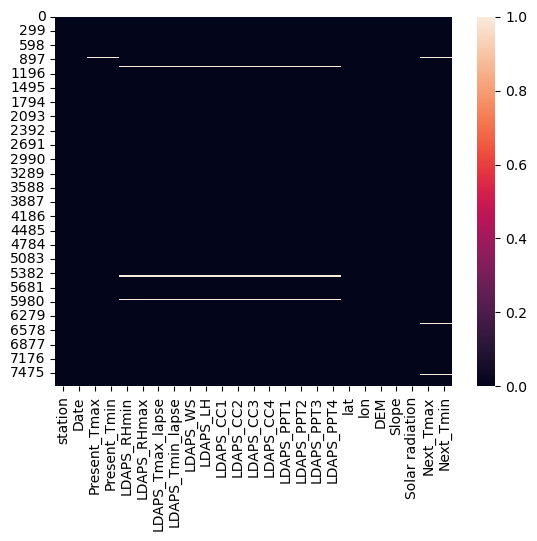

In [17]:
sns.heatmap(df.isnull())

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Convert the 'Date' column to datetime format 
df['Date'] = pd.to_datetime(df['Date'])

# Apply Label Encoding to the 'Date' column
df['Date'] = encoder.fit_transform(df['Date'])

In [19]:
df.fillna(df.mean(), inplace=True)

<AxesSubplot:>

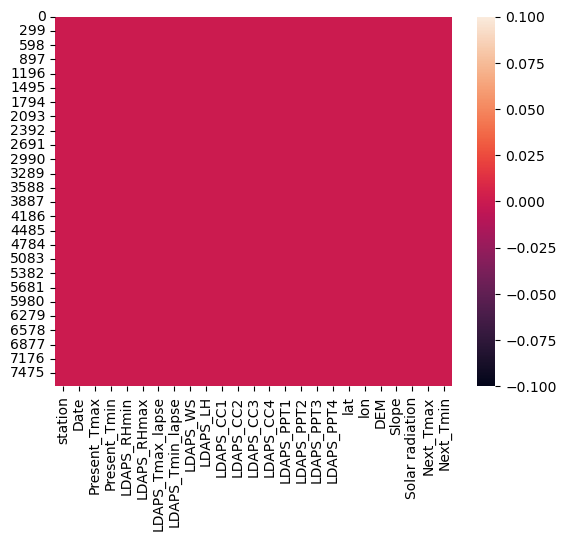

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.describe()#statiscal info

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,154.540119,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,89.517900,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,77.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,155.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,232.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,310.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [22]:
#checking number of unique values in each column

In [23]:
df.nunique().to_frame("Number of unique values")

,Number of unique values
station,25
Date,311
Present_Tmax,168
Present_Tmin,156
LDAPS_RHmin,7673
LDAPS_RHmax,7665
LDAPS_Tmax_lapse,7676
LDAPS_Tmin_lapse,7676
LDAPS_WS,7676
LDAPS_LH,7676


In [24]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

13.0    312
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
1.0     310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


12     25
207    25
214    25
213    25
212    25
       ..
119    25
117    25
97     25
76     25
310     2
Name: Date, Length: 311, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 168, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 156, dtype: int64


56.759372    75
77.030350     2
98.524734     2
19.794666     2
51.810596     2
             ..
52.924568     1
60.215191     1
46.799820     1
52.227486     1


In [25]:
#checking duplicate values

In [26]:
df.duplicated().sum()

0

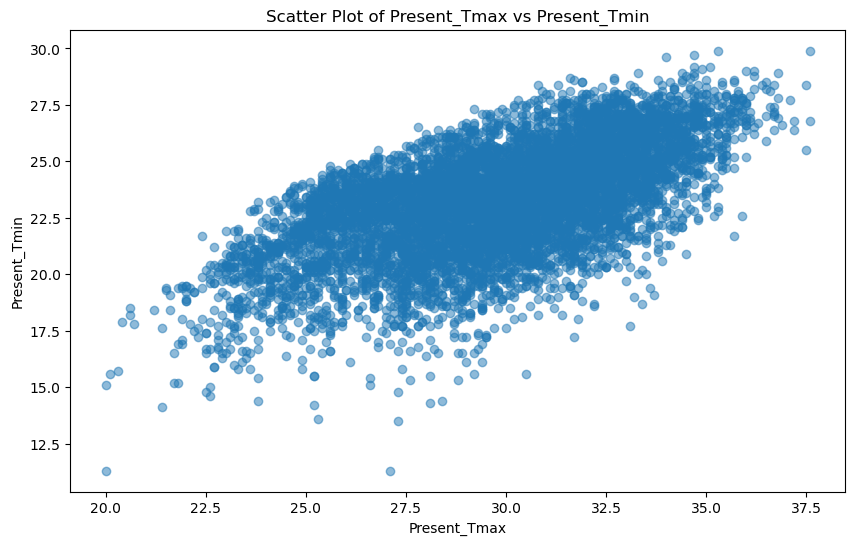

In [27]:
# Let's create a scatter plot of 'Present_Tmax' vs 'Present_Tmin'
plt.figure(figsize=(10, 6))
plt.scatter(df['Present_Tmax'], df['Present_Tmin'], alpha=0.5)
plt.title('Scatter Plot of Present_Tmax vs Present_Tmin')
plt.xlabel('Present_Tmax')
plt.ylabel('Present_Tmin')
plt.show()

In [28]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

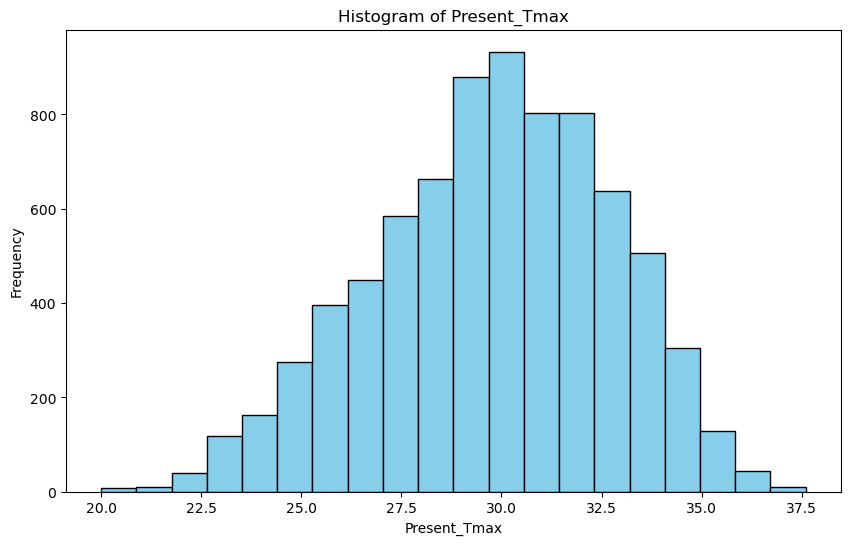

In [29]:
# Let's create a histogram of 'Present_Tmax'
plt.figure(figsize=(10, 6))
plt.hist(df['Present_Tmax'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Present_Tmax')
plt.xlabel('Present_Tmax')
plt.ylabel('Frequency')
plt.show()

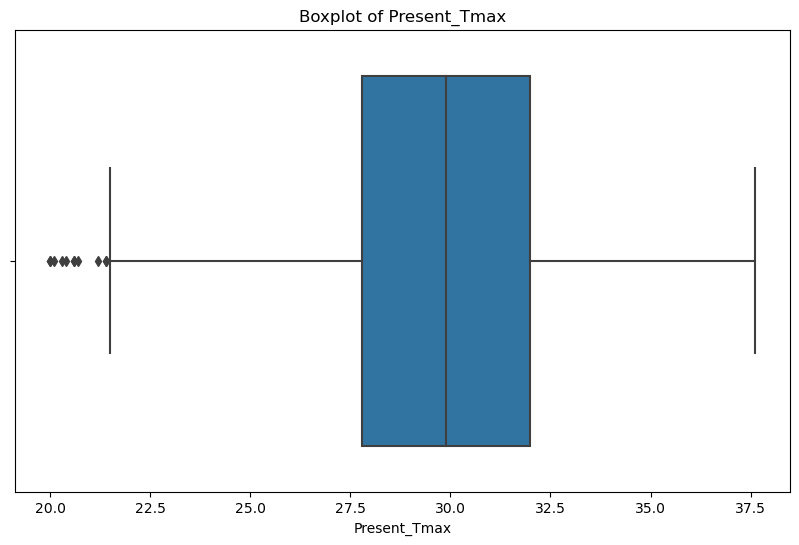

In [30]:
# Let's create a box plot of 'Present_Tmax'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Present_Tmax'])
plt.title('Boxplot of Present_Tmax')
plt.show()

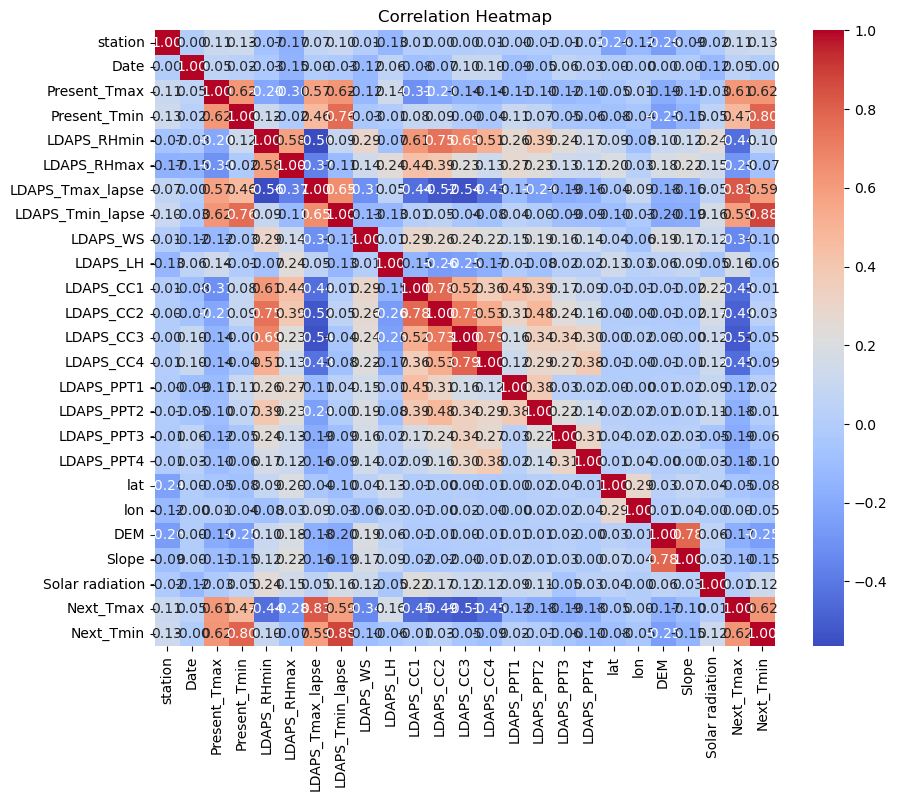

In [31]:
# Let's create a heatmap to visualize the correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

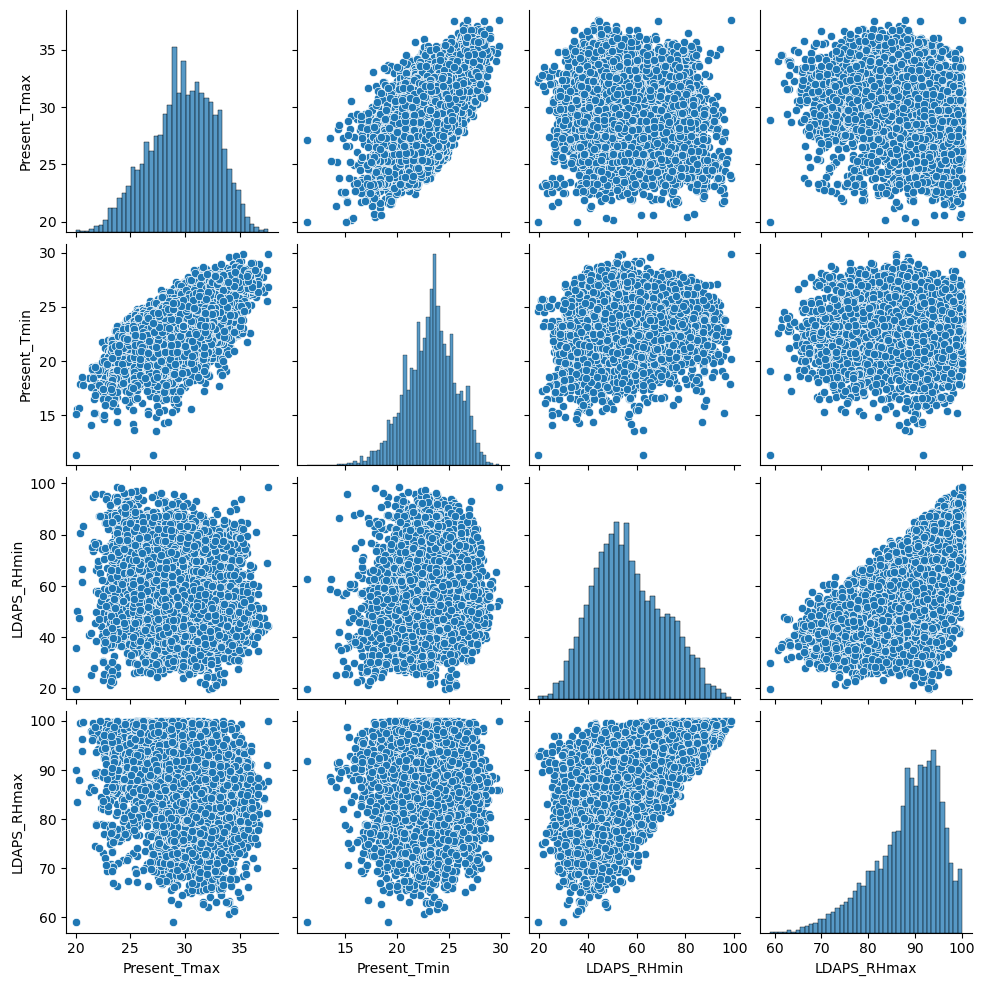

In [32]:
# Let's create a pair plot for a subset of columns
sns.pairplot(df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax']])
plt.show()

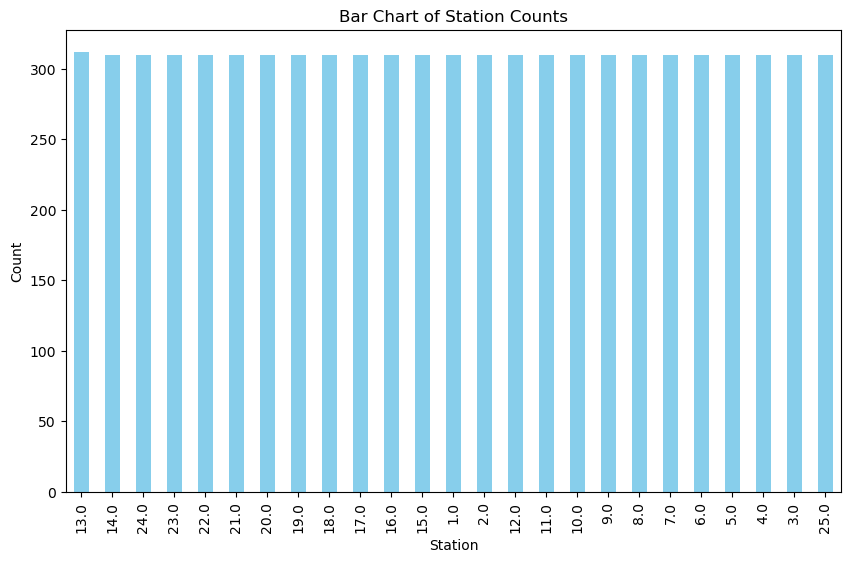

In [33]:
# Let's create a bar chart for 'station' counts
plt.figure(figsize=(10, 6))
df['station'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Station Counts')
plt.xlabel('Station')
plt.ylabel('Count')
plt.show()

In [34]:
# Let's check the skewness of the numeric columns
skewness = df.select_dtypes(include=[np.number]).apply(lambda x: x.skew())
print("Skewness:")
print(skewness)

Skewness:
station             0.000000
Date                0.000008
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64


In [35]:
# If skewness is significantly away from 0 (e.g., > 0.5 or <-0.5), consider applying a transformation
# Log transformation for positively skewed data
skewed_columns = skewness[abs(skewness) > 0.5].index

In [36]:
for col in skewed_columns:
    df[col] = np.log1p(df[col])

In [37]:
# Recheck the skewness after transformation
skewness_after = df.select_dtypes(include=[np.number]).apply(lambda x: x.skew())
print("\nSkewness after transformation:")
print(skewness_after)


Skewness after transformation:
station             0.000000
Date                0.000008
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -1.078475
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.940965
LDAPS_WS            0.683729
LDAPS_LH           -0.629556
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.384927
LDAPS_CC4           0.440554
LDAPS_PPT1          2.741574
LDAPS_PPT2          3.171648
LDAPS_PPT3          3.995810
LDAPS_PPT4          4.211296
lat                 0.087062
lon                -0.285213
DEM                 0.443730
Slope               0.836131
Solar radiation    -0.608007
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64


In [38]:
# Define a function to detect and handle outliers using IQR
def handle_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    # Replace outliers with the upper/lower bound
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

In [39]:
# Iterate through numeric columns to detect and handle outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [40]:
for col in numeric_columns:
    handle_outliers_iqr(col)

In [41]:
# Plot the distributions of numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64'])

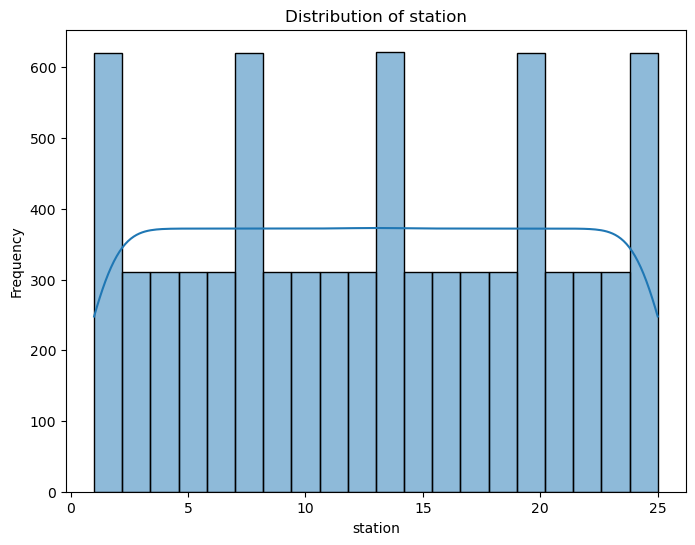

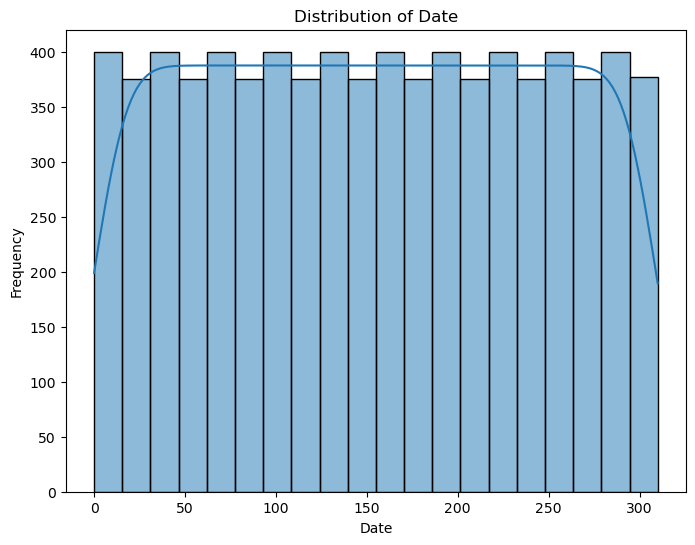

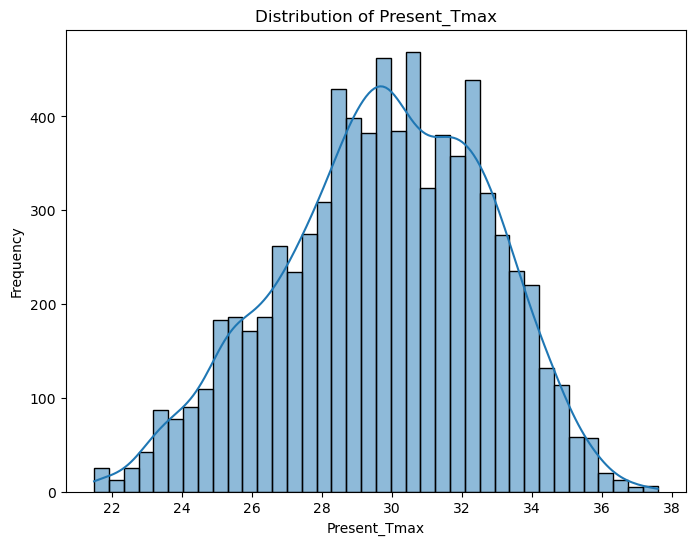

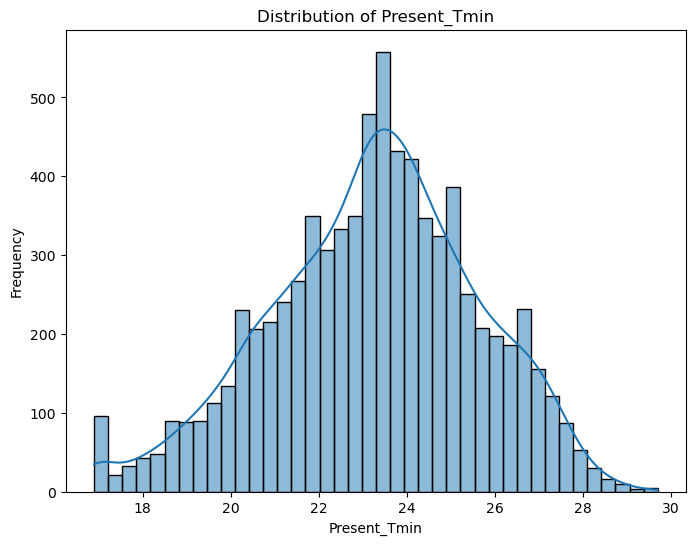

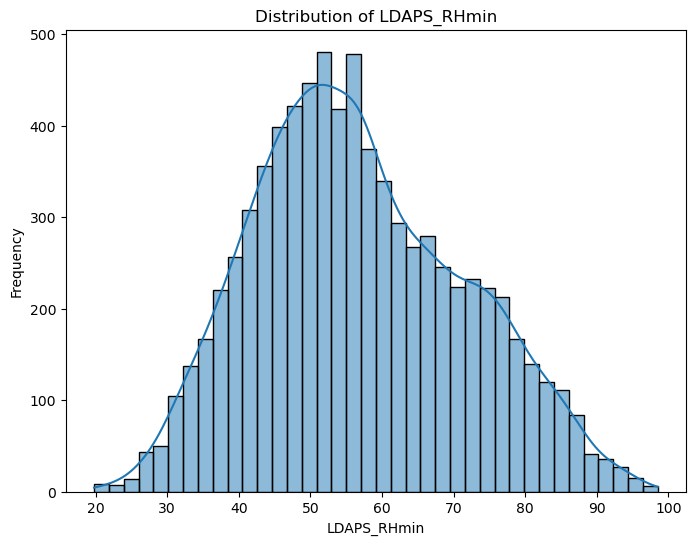

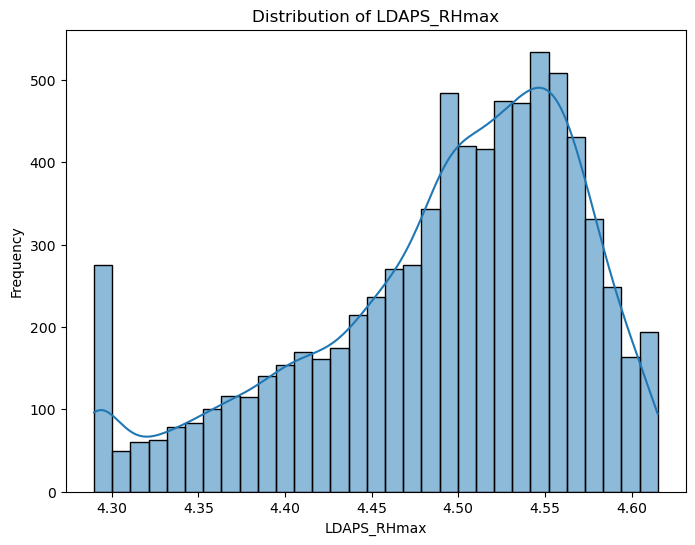

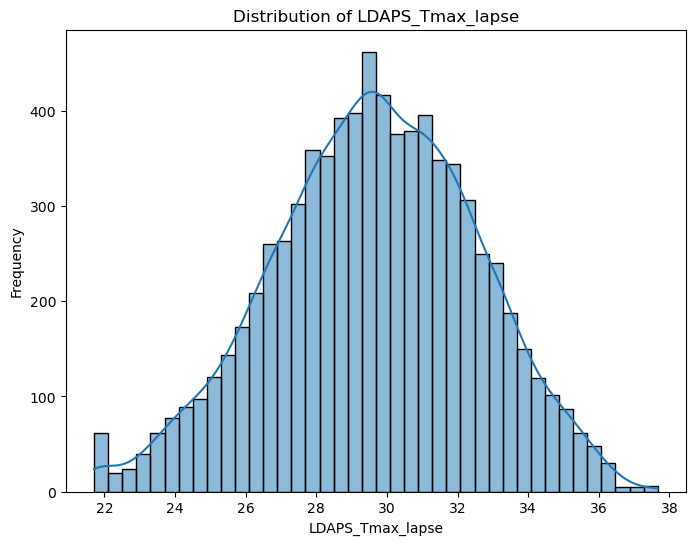

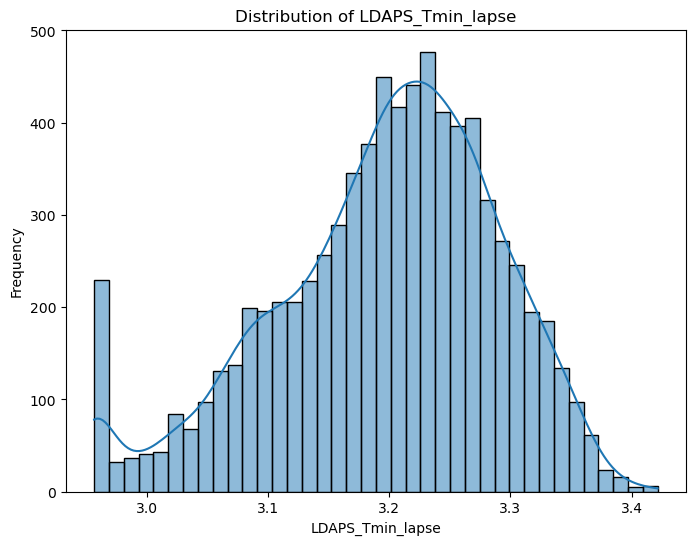

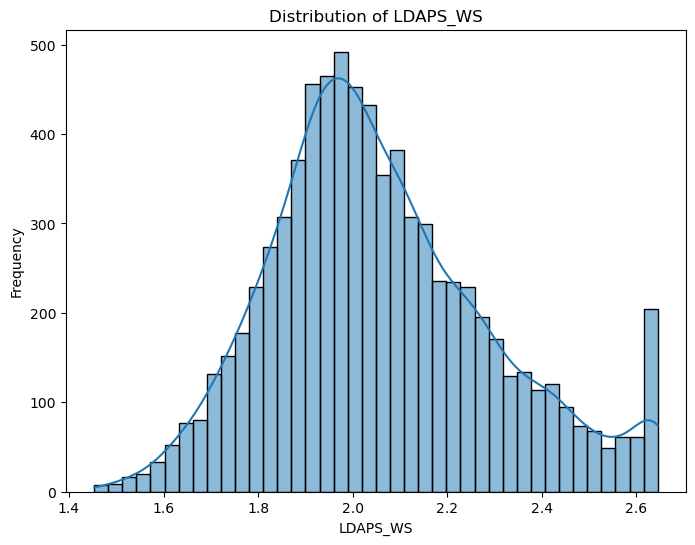

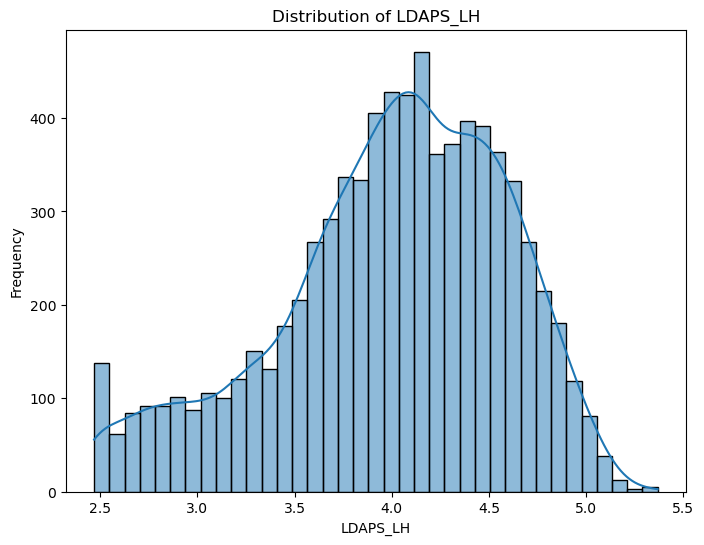

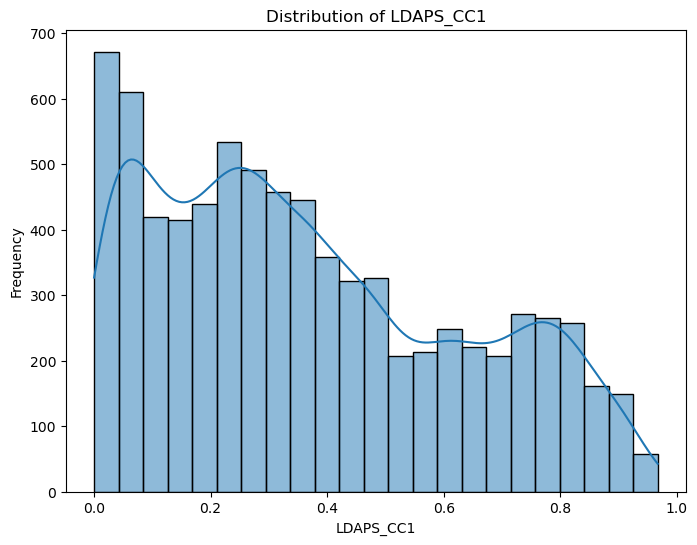

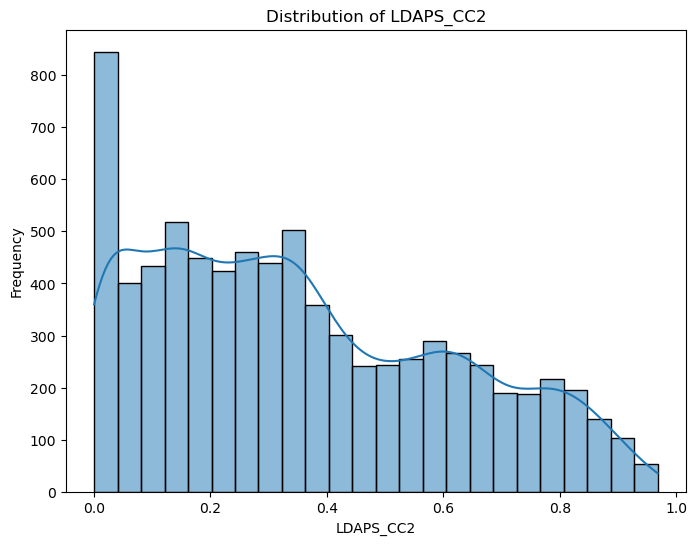

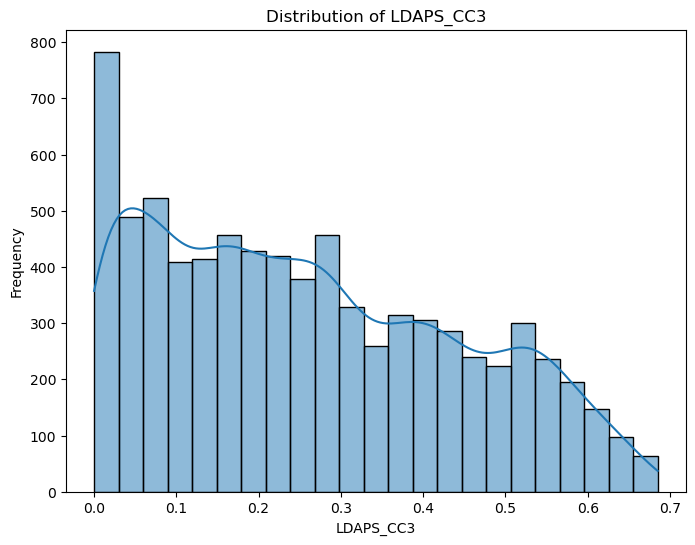

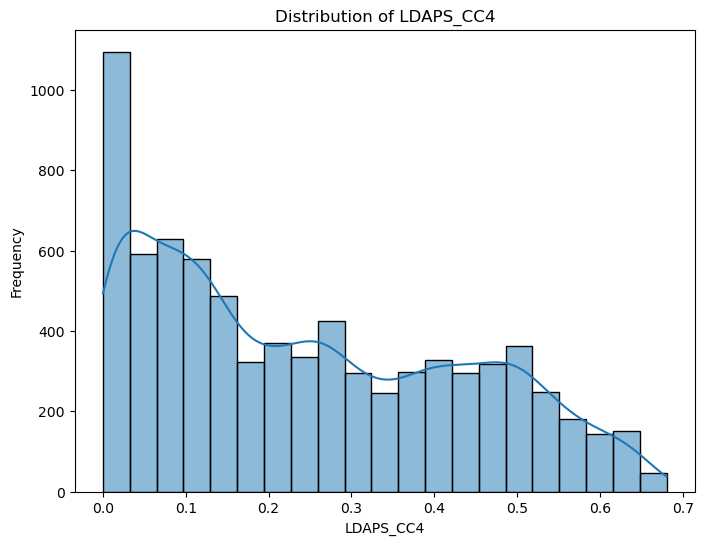

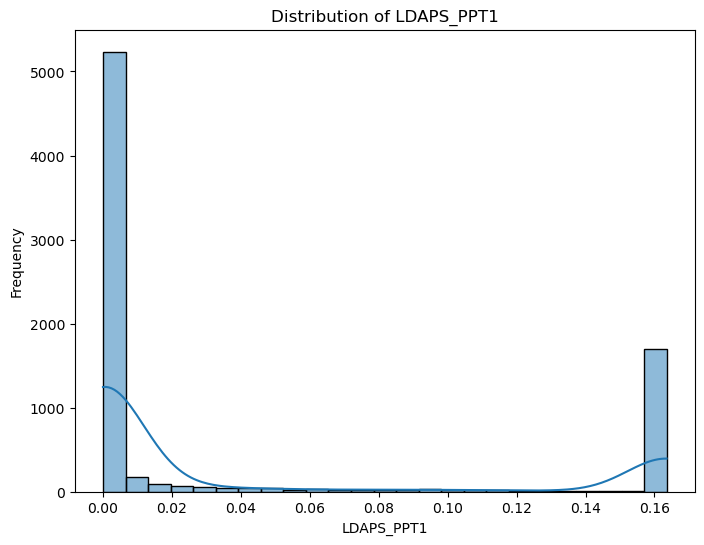

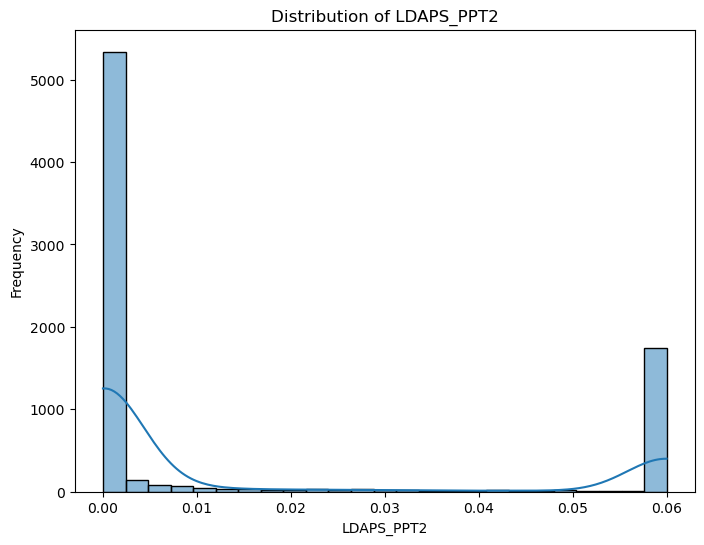

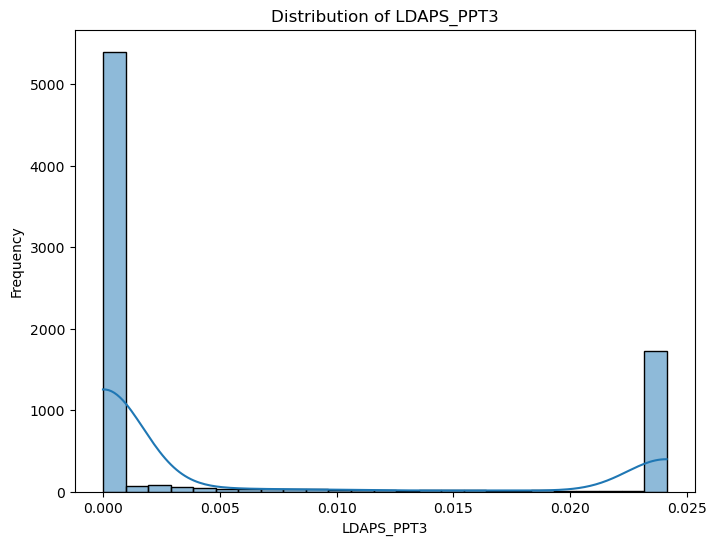

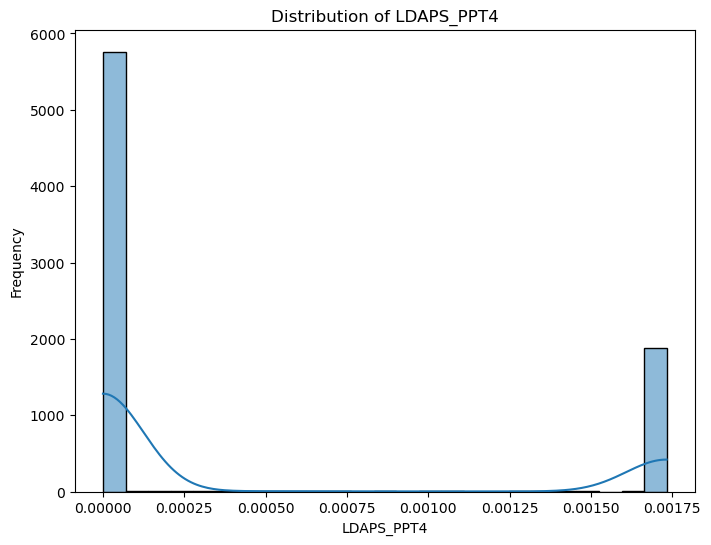

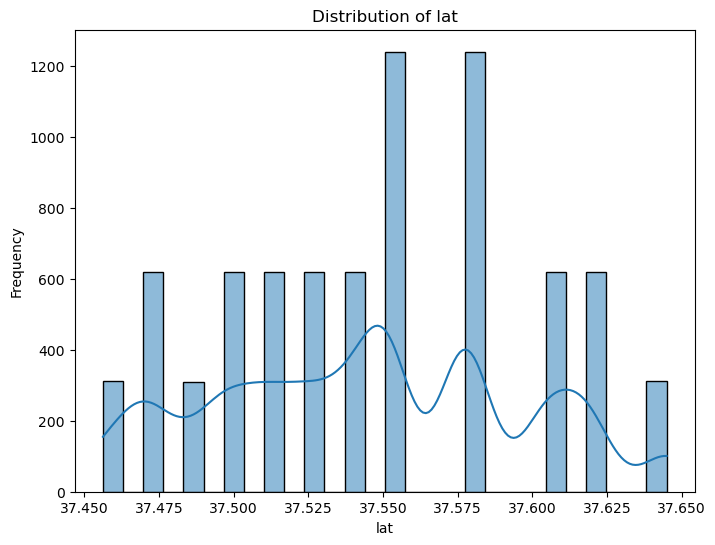

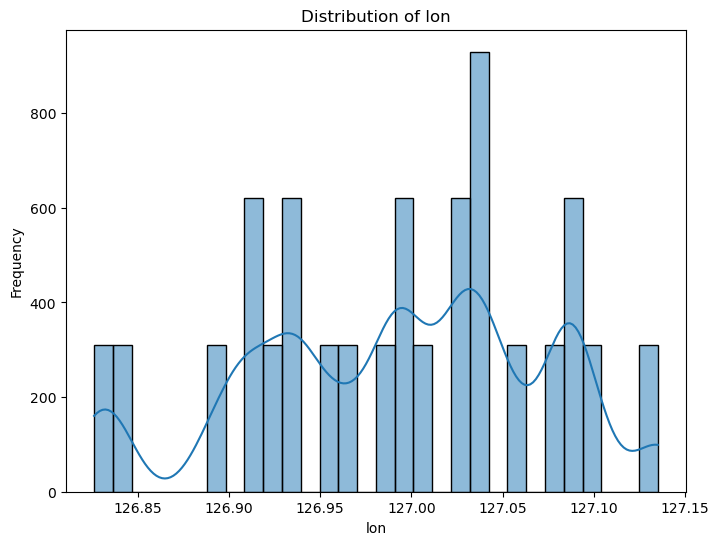

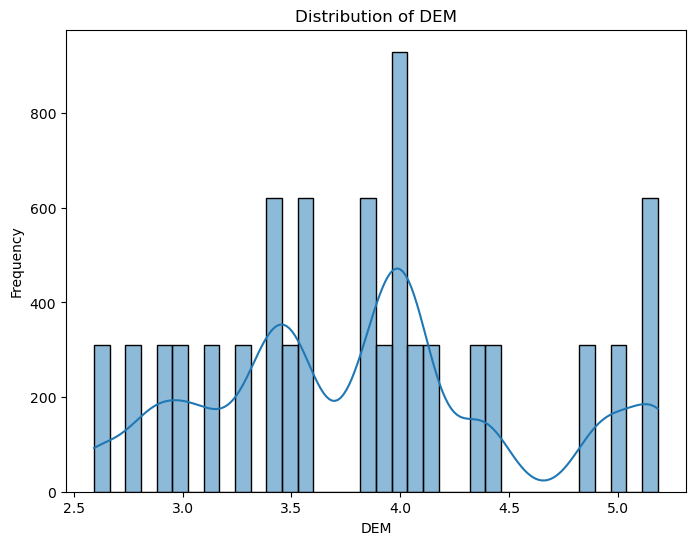

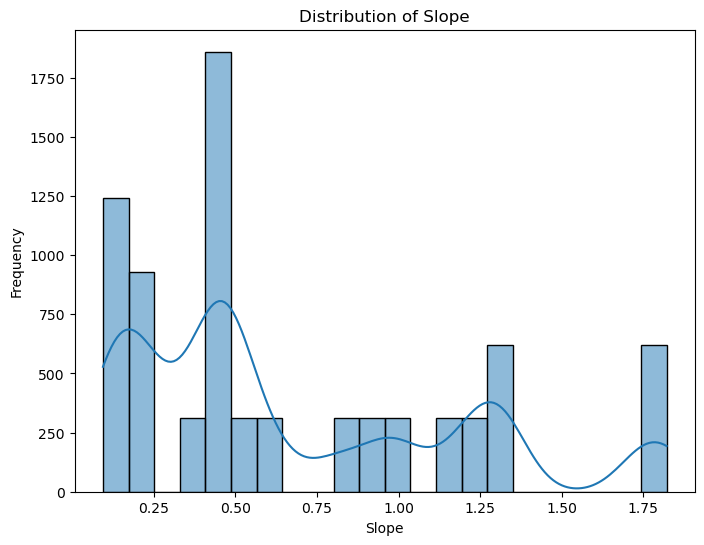

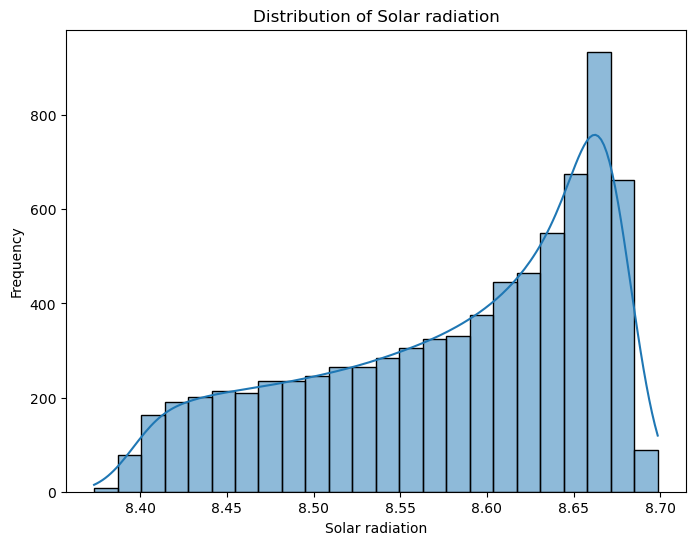

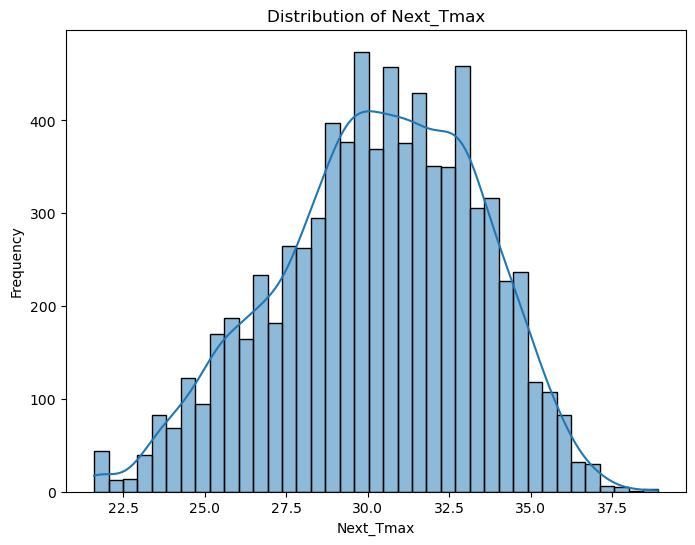

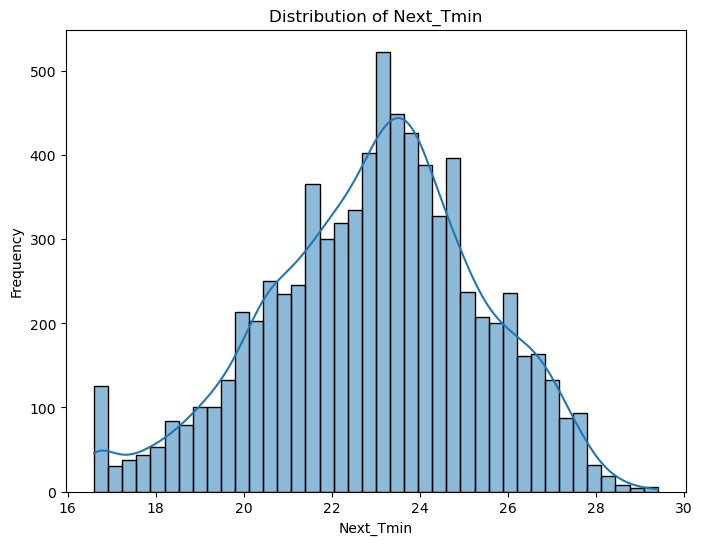

In [42]:
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

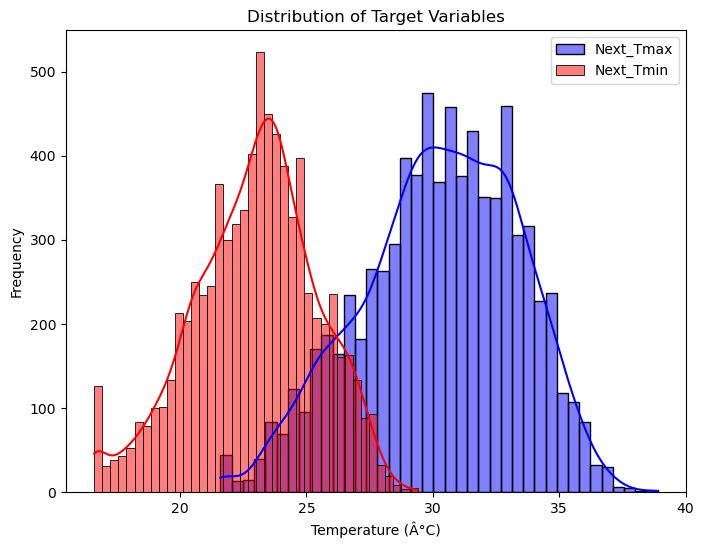

In [43]:
# Plot the distribution of target variables (Next_Tmax and Next_Tmin)
plt.figure(figsize=(8, 6))
sns.histplot(df['Next_Tmax'], kde=True, color='blue', label='Next_Tmax')
sns.histplot(df['Next_Tmin'], kde=True, color='red', label='Next_Tmin')
plt.title('Distribution of Target Variables')
plt.xlabel('Temperature (Â°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [44]:
# Correlation Analysis
correlation_matrix = df.corr()
relevant_features = correlation_matrix['Next_Tmax'].abs() > 0.1  
selected_features = correlation_matrix.loc[relevant_features, 'Next_Tmax'].index.tolist()

In [45]:
# Display the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']


In [46]:
# Feature Importance from Tree-Based Models (e.g., RandomForest)
from sklearn.ensemble import RandomForestRegressor

In [47]:
# Check for missing values
missing_values = df.isnull().sum()

In [48]:
# If there are missing values, you can handle them using imputation
if missing_values.any():
    # Simple imputation using mean for numeric columns
    df= df.fillna(df.mean())

In [49]:
# Assuming 'X' is your feature matrix and 'y' is the target variable
X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)  # Assuming these are the target variables
y = df['Next_Tmax']

In [50]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [51]:
feature_importances = rf.feature_importances_

In [52]:
# Combine feature names with their importances
feature_importance_dict = dict(zip(X.columns, feature_importances))

In [53]:
# Sort features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

In [54]:
# Display the sorted features
print("\nFeature Importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")


Feature Importance:
LDAPS_Tmax_lapse: 0.6747
Present_Tmax: 0.0531
LDAPS_CC1: 0.0339
Date: 0.0288
LDAPS_CC3: 0.0277
LDAPS_WS: 0.0224
LDAPS_CC4: 0.0221
Solar radiation: 0.0202
Present_Tmin: 0.0178
LDAPS_Tmin_lapse: 0.0168
LDAPS_CC2: 0.0145
LDAPS_LH: 0.0122
LDAPS_RHmin: 0.0118
LDAPS_RHmax: 0.0087
station: 0.0077
lon: 0.0051
LDAPS_PPT1: 0.0042
LDAPS_PPT3: 0.0041
DEM: 0.0034
lat: 0.0032
Slope: 0.0030
LDAPS_PPT2: 0.0029
LDAPS_PPT4: 0.0014


In [55]:
# Consider creating new features 
# Creating an interaction term between 'LDAPS_RHmax' and 'LDAPS_RHmin'
df['RH_interaction'] = df['LDAPS_RHmax'] * df['LDAPS_RHmin']

In [56]:
#Calculating the total precipitation for the day
df['Total_Precipitation'] = df['LDAPS_PPT1'] + df['LDAPS_PPT2'] + df['LDAPS_PPT3'] + df['LDAPS_PPT4']

In [57]:
#Creating a temperature range feature
df['Temperature_Range'] = df['Present_Tmax'] - df['Present_Tmin']

In [58]:
#Calculating the average cloud cover for the day
df['Avg_Cloud_Cover'] = (df['LDAPS_CC1'] + df['LDAPS_CC2'] + df['LDAPS_CC3'] + df['LDAPS_CC4']) / 4

In [59]:
#Creating a feature based on the slope and solar radiation
df['Slope_Solar_Radiation'] = df['Slope'] * df['Solar radiation']

In [60]:
#Categorizing temperatures into bins
bins = [0, 10, 20, 30, 40]
labels = ['Very Cold', 'Cold', 'Warm', 'Hot']
df['Temperature_Category'] = pd.cut(df['Present_Tmax'], bins=bins, labels=labels)

In [61]:
df['Date'] = pd.to_datetime(df['Date'])
#Creating a feature based on the day of the week (assuming 'Date' is a datetime column)
df['Day_of_Week'] = df['Date'].dt.day_name()

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [64]:
# Fit and transform the data using the scaler
scaled_features = scaler.fit_transform(X)

In [65]:
# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

In [66]:
# Concatenate the scaled features with the non-numeric columns
final_data = pd.concat([scaled_df, df[['Next_Tmax', 'Next_Tmin']]], axis=1)

In [67]:
correlation_matrix = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1).corr()

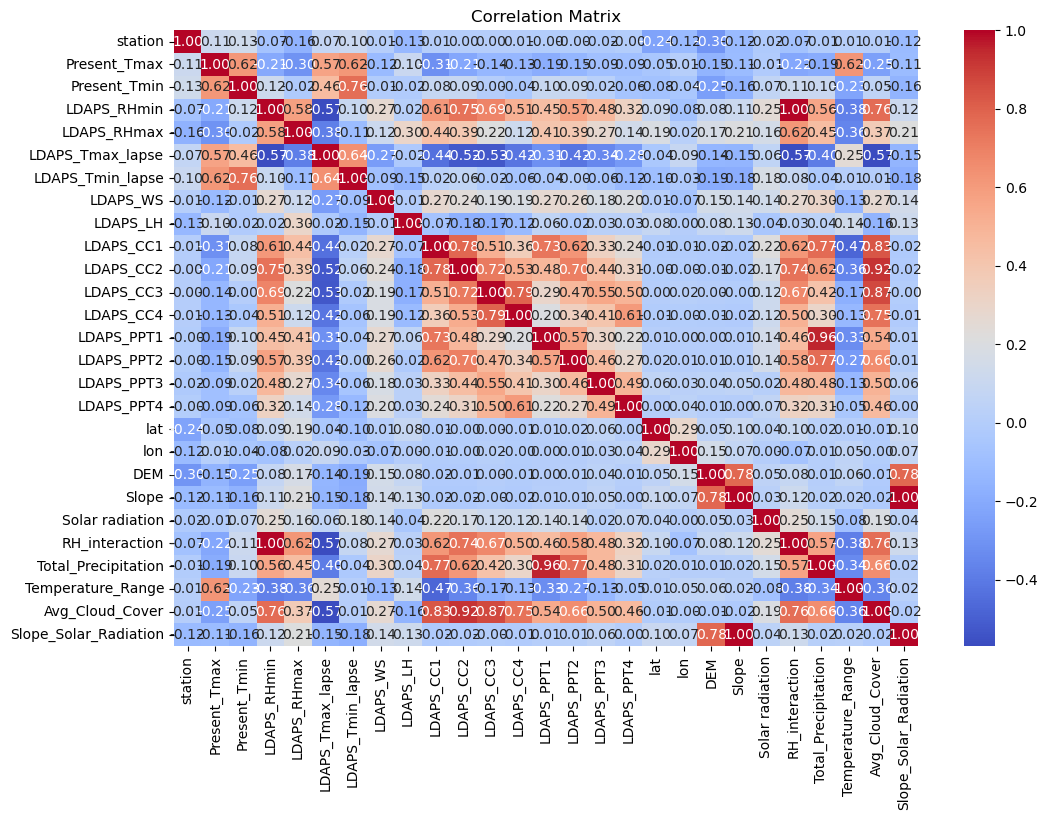

In [68]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [69]:
correlation_matrix 

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,RH_interaction,Total_Precipitation,Temperature_Range,Avg_Cloud_Cover,Slope_Solar_Radiation
station,1.000000,0.112202,0.132604,-0.066733,-0.164378,0.068902,0.103983,0.011411,-0.129154,0.006919,...,-0.237502,-0.118704,-0.296291,-0.121435,-0.018394,-0.074412,-0.006407,0.007189,0.005470,-0.121587
Present_Tmax,0.112202,1.000000,0.619672,-0.205001,-0.301479,0.569161,0.617659,-0.116592,0.100350,-0.312261,...,-0.052379,0.008891,-0.154519,-0.109525,-0.013473,-0.217154,-0.192942,0.623855,-0.249056,-0.109695
Present_Tmin,0.132604,0.619672,1.000000,0.121958,-0.019173,0.460049,0.760453,-0.010636,-0.015179,0.084617,...,-0.077951,-0.042974,-0.250787,-0.159008,0.066536,0.114675,0.099268,-0.226815,0.051049,-0.157932
LDAPS_RHmin,-0.066733,-0.205001,0.121958,1.000000,0.578510,-0.565818,0.097348,0.267507,0.015169,0.613818,...,0.087099,-0.076237,0.076638,0.112228,0.247391,0.998832,0.556792,-0.375829,0.762963,0.115419
LDAPS_RHmax,-0.164378,-0.301479,-0.019173,0.578510,1.000000,-0.380162,-0.114664,0.116115,0.298866,0.438435,...,0.190964,0.023999,0.169913,0.208847,0.155817,0.615373,0.452423,-0.355014,0.369378,0.210729
LDAPS_Tmax_lapse,0.068902,0.569161,0.460049,-0.565818,-0.380162,1.000000,0.642346,-0.265611,-0.024348,-0.439737,...,-0.041386,0.091060,-0.142378,-0.147954,0.057008,-0.569040,-0.396805,0.248173,-0.565601,-0.147136
LDAPS_Tmin_lapse,0.103983,0.617659,0.760453,0.097348,-0.114664,0.642346,1.000000,-0.088338,-0.146745,0.021741,...,-0.095692,-0.027469,-0.190913,-0.183205,0.175799,0.084780,-0.035710,0.009221,0.007075,-0.180956
LDAPS_WS,0.011411,-0.116592,-0.010636,0.267507,0.116115,-0.265611,-0.088338,1.000000,-0.008908,0.272525,...,0.013014,-0.066835,0.149346,0.142135,0.136354,0.266996,0.301798,-0.134089,0.269674,0.143997
LDAPS_LH,-0.129154,0.100350,-0.015179,0.015169,0.298866,-0.024348,-0.146745,-0.008908,1.000000,-0.069935,...,0.084512,0.003828,0.084089,0.126398,-0.043652,0.029792,0.042484,0.139640,-0.155915,0.125675
LDAPS_CC1,0.006919,-0.312261,0.084617,0.613818,0.438435,-0.439737,0.021741,0.272525,-0.069935,1.000000,...,-0.008131,-0.006843,-0.015670,-0.020649,0.218950,0.618527,0.770638,-0.471746,0.828999,-0.017841


In [70]:
df.dtypes

station                         float64
Date                     datetime64[ns]
Present_Tmax                    float64
Present_Tmin                    float64
LDAPS_RHmin                     float64
LDAPS_RHmax                     float64
LDAPS_Tmax_lapse                float64
LDAPS_Tmin_lapse                float64
LDAPS_WS                        float64
LDAPS_LH                        float64
LDAPS_CC1                       float64
LDAPS_CC2                       float64
LDAPS_CC3                       float64
LDAPS_CC4                       float64
LDAPS_PPT1                      float64
LDAPS_PPT2                      float64
LDAPS_PPT3                      float64
LDAPS_PPT4                      float64
lat                             float64
lon                             float64
DEM                             float64
Slope                           float64
Solar radiation                 float64
Next_Tmax                       float64
Next_Tmin                       float64


In [71]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encode Temperature_Category
encoder = OneHotEncoder()
temperature_category_encoded = encoder.fit_transform(df[['Temperature_Category']])

# Convert it back to a DataFrame and concatenate with the original DataFrame
temperature_category_df = pd.DataFrame(temperature_category_encoded.toarray(), columns=encoder.get_feature_names(['Temperature_Category']))
df = pd.concat([df, temperature_category_df], axis=1)
df = df.drop(columns=['Temperature_Category'])  # Drop the original column

# Label encode Day_of_Week
label_encoder = LabelEncoder()
df['Day_of_Week'] = label_encoder.fit_transform(df['Day_of_Week'])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.linear_model import Lasso, Ridge

# Assuming X_train and y_train are our training data and target variable

# LASSO Regression (L1 regularization)
lasso = Lasso(alpha=0.01)  
lasso.fit(X_train, y_train)

# Get the coefficients
lasso_coefs = lasso.coef_

# Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

# Get the coefficients
ridge_coefs = ridge.coef_

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = df.drop(['Next_Tmax', 'Next_Tmin', 'Date'], axis=1)
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

In [75]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [76]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'Neural Network': MLPRegressor()
}

In [77]:
# Iterate through the models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Evaluate the model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    print(f'{name}:')
    print(f'Training R-squared: {train_score:.4f}')
    print(f'Testing R-squared: {test_score:.4f}')
    print('-' * 30)

Linear Regression:
Training R-squared: 0.7618
Testing R-squared: 0.7631
------------------------------
Lasso Regression:
Training R-squared: 0.6970
Testing R-squared: 0.6875
------------------------------
Ridge Regression:
Training R-squared: 0.7611
Testing R-squared: 0.7608
------------------------------
Decision Tree:
Training R-squared: 1.0000
Testing R-squared: 0.8193
------------------------------
Random Forest:
Training R-squared: 0.9867
Testing R-squared: 0.9161
------------------------------
Gradient Boosting:
Training R-squared: 0.8764
Testing R-squared: 0.8622
------------------------------
Support Vector Machine:
Training R-squared: 0.5990
Testing R-squared: 0.5749
------------------------------
Neural Network:
Training R-squared: 0.7247
Testing R-squared: 0.7323
------------------------------


In [ ]:
from threading import Timer

def timeout():
    raise Exception('Grid search took too long to complete')

timer = Timer(3600, timeout)  # Set a timeout of 3600 seconds (1 hour)
timer.start()

from sklearn.model_selection import GridSearchCV

# Define separate models for min and max temperatures
min_temp_model = RandomForestRegressor()
max_temp_model = RandomForestRegressor()

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
# Define GridSearchCV for min temperature model
min_temp_search = GridSearchCV(min_temp_model, param_grid, cv=5, n_jobs=-1)
min_temp_search.fit(X_train, y_train)

# Define GridSearchCV for max temperature model
max_temp_search = GridSearchCV(max_temp_model, param_grid, cv=5, n_jobs=-1)
max_temp_search.fit(X_train, y_train)

# Get the best models and their parameters
best_min_temp_model = min_temp_search.best_estimator_
best_max_temp_model = max_temp_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters for Minimum Temperature Model:")
print(min_temp_search.best_params_)
print("\nBest Hyperparameters for Maximum Temperature Model:")
print(max_temp_search.best_params_)

# If grid search completes within the timeout period, cancel the timer
timer.cancel()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict minimum temperatures
min_temp_pred = best_min_temp_model.predict(X_test)

# Predict maximum temperatures
max_temp_pred = best_max_temp_model.predict(X_test)

# Calculate MAE, MSE, and R2 for minimum temperature
min_temp_mae = mean_absolute_error(y_min_temp_test, min_temp_pred)
min_temp_mse = mean_squared_error(y_min_temp_test, min_temp_pred)
min_temp_r2 = r2_score(y_min_temp_test, min_temp_pred)

# Calculate MAE, MSE, and R2 for maximum temperature
max_temp_mae = mean_absolute_error(y_max_temp_test, max_temp_pred)
max_temp_mse = mean_squared_error(y_max_temp_test, max_temp_pred)
max_temp_r2 = r2_score(y_max_temp_test, max_temp_pred)

# Print evaluation metrics for minimum temperature
print("Minimum Temperature Model Evaluation:")
print(f"MAE: {min_temp_mae:.2f}")
print(f"MSE: {min_temp_mse:.2f}")
print(f"R-squared: {min_temp_r2:.4f}")

# Print evaluation metrics for maximum temperature
print("\nMaximum Temperature Model Evaluation:")
print(f"MAE: {max_temp_mae:.2f}")
print(f"MSE: {max_temp_mse:.2f}")
print(f"R-squared: {max_temp_r2:.4f}")


In [ ]:
# Assuming rf is your trained Random Forest model
feature_importances = rf.feature_importances_

# Get the indices of features sorted by importance
sorted_indices = feature_importances.argsort()[::-1]

# Get the feature names
feature_names = X.columns

# Print the top 5 most important features
print("Top 5 Most Important Features:")
for i in sorted_indices[:5]:
    print(f"{feature_names[i]}: {feature_importances[i]}")

In [ ]:
import joblib

# Assuming rf_min and rf_max are your trained models for min and max temperature
joblib.dump(rf_min, 'rf_min_model.joblib')
joblib.dump(rf_max, 'rf_max_model.joblib')

# In your deployment environment
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load the models
rf_min = joblib.load('rf_min_model.joblib')
rf_max = joblib.load('rf_max_model.joblib')
predictions_min = rf_min.predict(X_test)
predictions_max = rf_max.predict(X_test)

In [ ]:
import datetime
import logging

def log_model_performance(metrics):
    current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    logging.info(f"{current_time} - Model Performance: {metrics}")

In [ ]:
def should_retrain(current_metrics, previous_metrics, threshold=0.02):
    return current_metrics < (1 - threshold) * previous_metrics

In [ ]:
def collect_new_data():
    # Code to fetch new data
    pass

In [ ]:
# Example: Periodic re-training
def retrain_model():
    new_data = collect_new_data()
    X_new, y_new = preprocess_data(new_data)
    
    # Retrain the model
    model.fit(X_new, y_new)
    
    # Log the re-training event
    log_model_performance(model.evaluate(X_new, y_new))

In [ ]:
# Example: Version control
def save_model_version(model, version):
    joblib.dump(model, f'model_v{version}.joblib')

In [ ]:
def deploy_staging(model_version):
    staged_model = joblib.load(f'model_v{model_version}.joblib')
    staging_data = load_staging_data()
    predictions = staged_model.predict(staging_data)

In [ ]:
def deploy_gradually(model_version, rollout_percentage):
    staged_model = joblib.load(f'model_v{model_version}.joblib')
    prod_data = load_prod_data()
    predictions = staged_model.predict(prod_data)
    # ...